# Tutorial QWAK - Continuous-Time Quantum Walks

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$

## 1. Definition

A set of $n$ qubits corresponds to $\mathbb{C}^{2^n}$ and the Hamiltonian $H$ is a self-adjoint operator acting on this space. When $H$ is time-independent, the states of the system will evolve in time, $\ket{\psi(t)}$, governed by

$$\ket{\psi(t)} = e^{-iHt}\ket{\psi(0)}$$,

where $\ket{\psi(0)}$ is the initial condition of the system. In the case of a continuous-time quantum walk (CTQW), our Hamiltonian is always associated to the adjacency matrix of a graph (A) or the laplacian matrix (L) and, from now on, we will assume our Hamiltonian is always the former.

When working with CTQW, we will always need ways to create initial states, get probabilities distributions from any type of graph, and checking for transport phenomon like perfect state transfer (PST). We will now see how to do all that with QWAK.

## 2. Creating initial states

In [1]:
from qwak.State import State
from qwak.Operator import Operator
from qwak import qwak as qw
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

First we define the number of nodes

In [2]:
n = 7

The first option is to create a uniform superposition of the selected nodes with the class State. We feed the class with the number of nodes and a list of nodes that will be in superposition. Then, the attribute buildState() creates the desired initial state.

In [3]:
init_nodes = [3]

init_state = State(n,init_nodes)
init_state.buildState()

print(init_state.getStateVec())

[[0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [1.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]]


It is also possible to create a state with custom amplitudes. To do it, we will give a list of tuples to State, where the first entry of the tuple is the node and the seconed the amplitude associated to the node. Notice in the following example that we are build a initial state given by $\ket{\psi_0}=\frac{\sqrt{3}}{2}\ket{0}+\frac{1}{2}\ket{1}$.

In [4]:
init_list = [(0,np.sqrt(3)/2),(1,1/2)]

cust_init_state = State(n,[],init_list)
cust_init_state.buildState()

print(cust_init_state.getStateVec())

[[0.8660254+0.j]
 [0.5      +0.j]
 [0.       +0.j]
 [0.       +0.j]
 [0.       +0.j]
 [0.       +0.j]
 [0.       +0.j]]


## 3. Building the quantum walk

Now that we defined our initial state, we are one step closer to get the dynamics of a CTQW. Before that, we now need to define the operator associated with our graph for the time evolution. 

In [5]:
t = 20
n = 200
x0 = [int(n/2)]
graph = nx.path_graph(n)
quantum_walk = qw.QWAK(graph, laplacian = False)
quantum_walk.runWalk(t, x0)

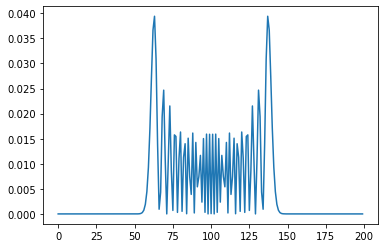

In [6]:
quantum_walk_prob = quantum_walk.getProbDist()
plt.plot(quantum_walk_prob.getProbVec())

To check that the result is correct, we will compare with the expected analytical result. The quantum walk in an undirected infinite path graph is given by Bessel functions $J_n(x)$ and the state after time $t$ will be

$$\ket{\Psi(t)} = \sum_{x=-\infty}^{\infty}i^{x-x_0}J_{x-x_o}(2t)\ket{x}$$

In [7]:
import scipy.special as sp
from scipy.linalg import expm
import sympy as simp

In [8]:
n = 200
t = 20
x0 = int(n/2)
prob = np.zeros([n + 1])

for x in range(n + 1):
    prob[x] = sp.jv(x - x0, 2*t)**2

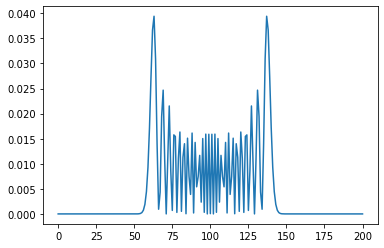

In [9]:
plt.plot(prob)

Great! It looks like it worked!

## 4. A few other examples

We will check now the quantum walk for a complete graph which are known for locazalition, i.e. the walker stays on the same vertex that it started.

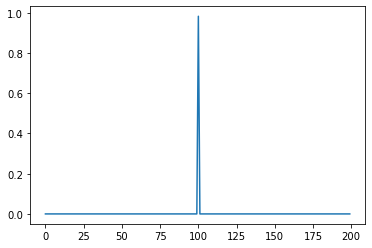

In [10]:
t = 20
n = 200
x0 = [int(n/2)]
graph = nx.complete_graph(n)

quantum_walk = qw.QWAK(graph, laplacian = False)
quantum_walk.runWalk(t, x0)
quantum_walk_prob = quantum_walk.getProbDist()
plt.plot(quantum_walk_prob.getProbVec())

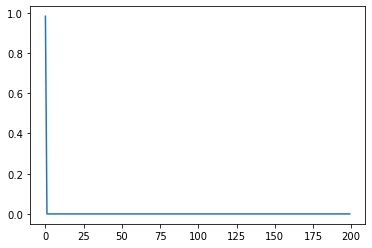

In [11]:
t = 20
n = 200
x0 = [0]
graph = nx.complete_graph(n)

quantum_walk = qw.QWAK(graph, laplacian = False)
quantum_walk.runWalk(t, x0)
quantum_walk_prob = quantum_walk.getProbDist()
plt.plot(quantum_walk_prob.getProbVec())

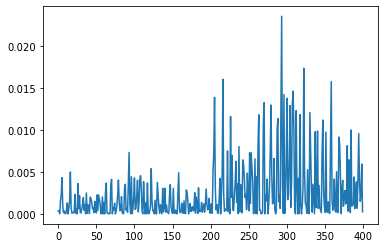

In [12]:
t = 200
n = 200
x0 = [int(n/2)]
graph = nx.ladder_graph(n)

quantum_walk = qw.QWAK(graph, laplacian = False)
quantum_walk.runWalk(t, x0)
quantum_walk_prob = quantum_walk.getProbDist()
plt.plot(quantum_walk_prob.getProbVec())

## 5. Perfect State Transfer

Perfect state transfer (PST) occurs in some graphs where a initial state is transferred from one vertex to another at some time $t$. We can define PST between vertices $a$ and $b$ as

$$|\bra{b}e^{-itH}\ket{a}|^2= 1$$.

For undirected graphs, this phenomenon is well characterized and we have a way for testing it in our package. We will start with the cycle graph with four vertices and PST occurs between every antipodal pair of the graph, $1$ to $3$ or $2$ to $4$. After building the walk, the method .checkPST(a,b) returns the time, if PST occurs, or -1 if it doesn't.

In [17]:
graph = nx.cycle_graph(4)
quantum_walk = qw.QWAK(graph, laplacian = False)
print(quantum_walk.checkPST(0,2))





















0.5*pi


In [18]:
print(quantum_walk.checkPST(0,1))





















-1


Another example are the complete bipartite graphs with $2$ vertices on one side and $m$ vertices on another.

In [19]:
graph = nx.complete_bipartite_graph(2,4)
quantum_walk = qw.QWAK(graph, laplacian = False)
print(quantum_walk.checkPST(0,1))








































0.353553390593274*pi
